In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
dataset = pd.read_csv("Raw data/Summer/Levering_summer.csv")
dataset['datetime'] = pd.to_datetime(dataset['datetime'], infer_datetime_format=True)
indexDataset = dataset.set_index(['datetime'])

In [74]:
from datetime import datetime
indexDataset.tail(5)

,SOM,Klant 1,Klant 2,Klant 3,Klant 4,Klant 5,Klant 6,Klant 8,Klant 9,Klant 10,...,Klant 74,Klant 76,Klant 77,Klant 78,Klant 79,Klant 80,Klant 81,Klant 82,leverende klanten,niet leverenden
datetime,,,,,,,,,,,,,,,,,,,,,
2013-09-22 22:45:00,6331.0,168.0,117.0,19.0,15.0,43.0,87.0,144.0,77.0,29.0,...,61.0,95.0,79.0,150.0,185.0,157.0,36.0,65.0,1559,5462
2013-09-22 23:00:00,5668.0,104.0,80.0,24.0,18.0,13.0,88.0,133.0,83.0,27.0,...,57.0,91.0,89.0,154.0,175.0,164.0,36.0,67.0,1551,4858
2013-09-22 23:15:00,5512.0,103.0,105.0,7.0,16.0,11.0,85.0,142.0,90.0,9.0,...,50.0,84.0,95.0,150.0,196.0,108.0,31.0,54.0,1320,4270
2013-09-22 23:30:00,6243.0,86.0,81.0,10.0,18.0,14.0,80.0,159.0,78.0,11.0,...,49.0,72.0,60.0,168.0,183.0,124.0,18.0,59.0,1272,4320
2013-09-22 23:45:00,5449.0,117.0,96.0,13.0,16.0,14.0,72.0,151.0,54.0,26.0,...,48.0,73.0,32.0,151.0,197.0,163.0,15.0,61.0,1368,4721


In [75]:
indexDataset = indexDataset['SOM']
indexDataset = pd.DataFrame(indexDataset)
indexDataset

,SOM
datetime,
2013-06-20 00:00:00,5736.0
2013-06-20 00:15:00,6440.0
2013-06-20 00:30:00,5239.0
2013-06-20 00:45:00,5260.0
2013-06-20 01:00:00,4758.0
...,...
2013-09-22 22:45:00,6331.0
2013-09-22 23:00:00,5668.0
2013-09-22 23:15:00,5512.0


In [76]:
indexDataset.iloc[0:1000,:]

,SOM
datetime,
2013-06-20 00:00:00,5736.0
2013-06-20 00:15:00,6440.0
2013-06-20 00:30:00,5239.0
2013-06-20 00:45:00,5260.0
2013-06-20 01:00:00,4758.0
...,...
2013-06-30 08:45:00,6185.0
2013-06-30 09:00:00,6552.0
2013-06-30 09:15:00,8581.0


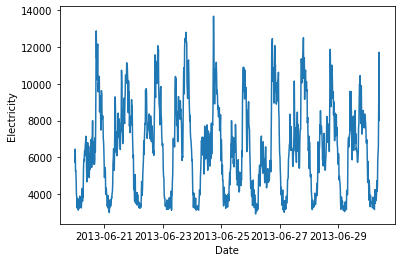

In [84]:

plt.xlabel("Date")
plt.ylabel("Electricity")
plt.plot(indexDataset.iloc[0:1000,:])

In [78]:
# Check stationary, mean variable?
rolmean = indexDataset.iloc[0:1000,:].rolling(window=10).mean()
rolstd = indexDataset.iloc[0:1000,:].rolling(window= 10).std()
print(rolmean,rolstd)
# first 9 rows no data (window=10)

                        SOM
datetime                   
2013-06-20 00:00:00     NaN
2013-06-20 00:15:00     NaN
2013-06-20 00:30:00     NaN
2013-06-20 00:45:00     NaN
2013-06-20 01:00:00     NaN
...                     ...
2013-06-30 08:45:00  4465.7
2013-06-30 09:00:00  4770.6
2013-06-30 09:15:00  5235.9
2013-06-30 09:30:00  5993.4
2013-06-30 09:45:00  6429.0

[1000 rows x 1 columns]                              SOM
datetime                        
2013-06-20 00:00:00          NaN
2013-06-20 00:15:00          NaN
2013-06-20 00:30:00          NaN
2013-06-20 00:45:00          NaN
2013-06-20 01:00:00          NaN
...                          ...
2013-06-30 08:45:00   892.466377
2013-06-30 09:00:00  1036.269077
2013-06-30 09:15:00  1538.715731
2013-06-30 09:30:00  2503.196676
2013-06-30 09:45:00  2428.970152

[1000 rows x 1 columns]


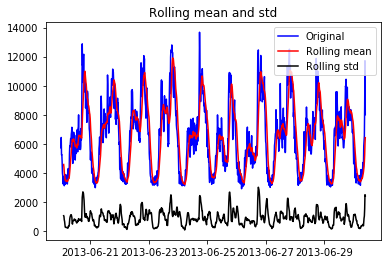

In [79]:
# plot rolling statistics
orig = plt.plot(indexDataset.iloc[0:1000,:],color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and std')
plt.show(block=False)

In [80]:
from statsmodels.tsa.stattools import adfuller

In [82]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexDataset.iloc[0:1000,:]['SOM'], autolag='AIC')
# AIC gives you difference between exact value

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic",'p-value',"#lags used",
                                        'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.154851e+00
p-value                        9.480340e-13
#lags used                     2.200000e+01
Number of Observations Used    9.770000e+02
Critical Value (1%)           -3.437061e+00
Critical Value (5%)           -2.864503e+00
Critical Value (10%)          -2.568348e+00
dtype: float64
